In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from colorama import Back, Fore, Style
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from icecream import ic
car_db = pd.read_csv("car_price_dataset.csv")

## Revision de Datos

In [3]:
### Descibe
car_db.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [4]:
### Columns
car_db.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [5]:
### DataBase
car_db

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


# Regresion Lineal Simple

## Ejercicio 1:  Predicción del precio en función del kilometraje


#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función de su kilometraje.
#### Variables:*
-Variable independiente (X): Mileage (kilometraje)
-Variable dependiente (y): Price (precio)
#### Pasos:*
- Importa las bibliotecas necesarias (por ejemplo, pandas y scikit-learn en Python).
- Carga tu conjunto de datos car_price_dataset.csv.
- Selecciona las columnas Mileage y Price.
- Divide tus datos en conjuntos de entrenamiento y prueba.
- Crea un modelo de regresión lineal simple y entrénalo con los datos de entrenamiento.
- Evalúa el rendimiento de tu modelo utilizando métricas como el error cuadrático medio (MSE) o el coeficiente de determinación R².
- Visualiza tus resultados con un gráfico de dispersión y la línea de regresión.

In [6]:
car_db = pd.read_csv("car_price_dataset.csv")

In [7]:
### Division de Datos
X = car_db["Mileage"].values.reshape(-1,1) 
y = car_db["Price"].values



In [8]:
### Datos de Entrenamiento y Testeo

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
### Entrenamiento
model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

In [10]:
### Prediccion
y_pred = model.predict(X_test)


In [11]:
### Comparacion implicita
print(Fore.RED + f"Datos de la prediccion: {y_pred[:4]}")
print(Fore.BLUE + f"Datos Reales n: {y_test[:4]}")

Datos de la prediccion: [ 6669.62490221  9580.20926565 11540.61155969  9151.34820866]
Datos Reales n: [ 2000 11164 14630  7334]


In [12]:
### Metricas

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(Fore.RED + f"El RMSE es: {rmse}")

r2 = r2_score(y_test, y_pred)

print(Fore.RED + f"El RMSE es: {(r2)}")

El RMSE es: 2532.432095652605
El RMSE es: 0.3019869774558347


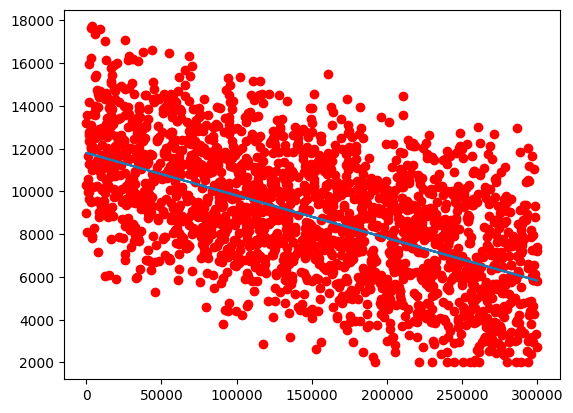

In [13]:
### Visualizacion
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred)
plt.show()

##

## Ejercicio 2: Predicción del precio en función del año

#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función de su año de fabricación.
#### Variables:*
#### Variable independiente (X): Year (año)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Year y Price.

In [14]:
## Dividimos los datos en entrenamiento y testeo
X = car_db["Year"].values.reshape(-1,1)
y = car_db["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [15]:
### Entrenamiento y Prediccion
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
### Comparacion de Prediccion  y valores Reales
print(Fore.RED + "Valores de la Prediccion: " + Style.RESET_ALL)
print(y_pred[:4])
print(Fore.BLUE + "Valores de Reales: " + Style.RESET_ALL)
print(y_test[:4])

Valores de la Prediccion: 
[6007.41302615 7802.1006309  8101.21523169 8998.55903406]
Valores de Reales: 
[ 2437  7528 11373  9487]


In [16]:
### Metricas de Evalucion
mrse = mean_squared_error(y_test, y_pred, squared=False)
print(Fore.LIGHTBLACK_EX + f"El RMSE es: {mrse}" + Style.RESET_ALL)
r2 = r2_score(y_test, y_pred)
print(Fore.LIGHTRED_EX + f"El R2 es: {r2}" + Style.RESET_ALL)

El RMSE es: 2370.6344142754892
El R2 es: 0.4218848179675082


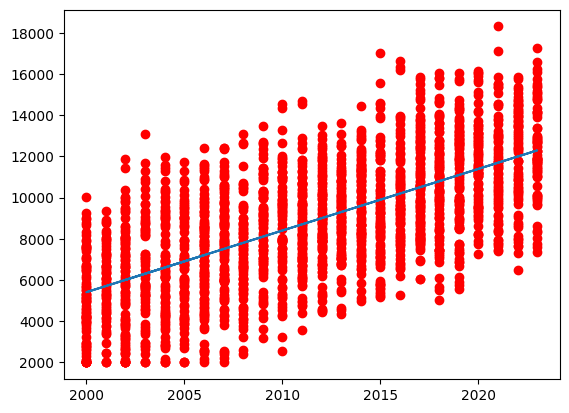

In [17]:
### Visualizacion

plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred)
plt.show()


## Ejercicio 3: Predicción del precio en función del tamaño del motor


#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función del tamaño de su motor.
#### Variables:*
#### Variable independiente (X): Engine_Size (tamaño del motor)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Engine_Size y Price.

In [18]:
### Preparacion de los Datos
X= car_db["Engine_Size"].values.reshape(-1,1)
y = car_db["Price"].values

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size= 0.2, random_state=42)

In [19]:
### Entrenamiento y Prediccion
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
### Comparacion de Prediccion  y valores Reales
print(Fore.RED + "Valores de la Prediccion: " + Style.RESET_ALL)
print(y_pred[:4])
print(Fore.BLUE + "Valores de Reales: " + Style.RESET_ALL)
print(y_test[:4])

Valores de la Prediccion: 
[ 7062.0268113   8733.48445447 10798.22624897  9618.37379497]
Valores de Reales: 
[ 2000 11164 14630  7334]


In [20]:
### Metricas
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(Fore.RED + f"EL RMESE es: {rmse}" + Style.RESET_ALL)
r2 = r2_score(y_test, y_pred)
print(Fore.RED + f"EL r2 es: {r2}" + Style.RESET_ALL)


EL RMESE es: 2856.241340090239
EL r2 es: 0.11207208776506228


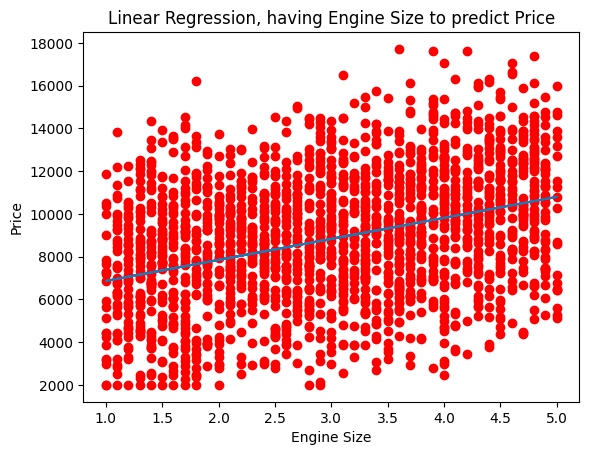

In [21]:
### Visualizacion
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred)
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Linear Regression, having Engine Size to predict Price")
plt.show()

#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función del tamaño de su motor.
#### Variables:*
#### Variable independiente (X): Engine_Size (tamaño del motor)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Engine_Size y Price.

## Ejercicio 4: Predicción del precio en función del número de propietarios anteriores

#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función del número de propietarios anteriores.
#### Variables:*
#### Variable independiente (X): Ower_Count (número de propietarios anteriores)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en los ejercicios anteriores, pero utilizando las columnas Ower_Count y Price.

In [22]:
### Division de Datos

X = car_db["Owner_Count"].values.reshape(-1,1)
y = car_db["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
### Entrenamiento y Prediccion
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
### Comparacion de Datos
print(Back.GREEN + Fore.RED + "Datos de la Prediccion" + Style.RESET_ALL)
print(y_pred[:4])
print(Back.RED + Fore.BLUE + "Datos de Reales" + Style.RESET_ALL)
print(y_test[:4])

Datos de la Prediccion
[8828.39462695 8828.74383136 8828.56922916 8828.39462695]
Datos de Reales
[ 2000 11164 14630  7334]


In [24]:
### Metricas
rmse = mean_squared_error(y_test, y_pred, squared= False)
print(Fore.BLACK + Back.WHITE + f"El RMSE es: {rmse}")
r2 = r2_score(y_test, y_pred)
print(Fore.WHITE + Back.BLACK + f"El r2 es: {r2}")

El RMSE es: 3033.561782449316
El r2 es: -0.0015983391323060037


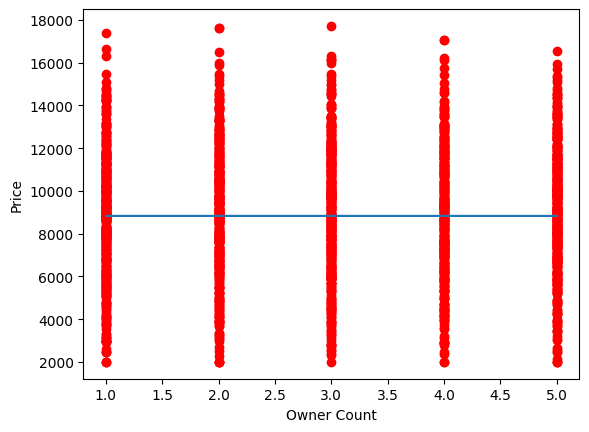

In [25]:
### Visualizacion
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred)
plt.xlabel("Owner Count")
plt.ylabel("Price")
plt.show()

## Ejercicio 5: Predicción del precio en función del número de puertas

#### Objetivo: Crear un modelo de regresión lineal simple para predecir el precio de un coche en función del número de puertas.
#### Variables:*
#### Variable independiente (X): Doors (número de puertas)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en los ejercicios anteriores, pero utilizando las columnas Doors y Price.

In [26]:
### Division de Datos
X = car_db["Doors"].values.reshape(-1,1)
y = car_db["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
### Entrenamiento y Prediccion

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
### Comparacion del Rendimiento del Modelo
print(Style.BRIGHT  + "Datos Predichos" + Style.RESET_ALL)
print(y_pred[:4])
print(Style.DIM  + "Datos Reales" + Style.RESET_ALL)
print(y_test[:4])


Datos Predichos
[8847.75546985 8847.75546985 8847.75546985 8835.05128818]
Datos Reales
[ 2000 11164 14630  7334]


In [28]:
### Metricas de Evaluacion
print(Fore.RED + Back.CYAN + "El rmse es" + Style.RESET_ALL)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)
print(Fore.YELLOW + Back.CYAN + "El r2 es" + Style.RESET_ALL)
r2 = r2_score(y_test, y_pred)
print(r2)

El rmse es
3033.8199415863874
El r2 es
-0.0017688204238202054


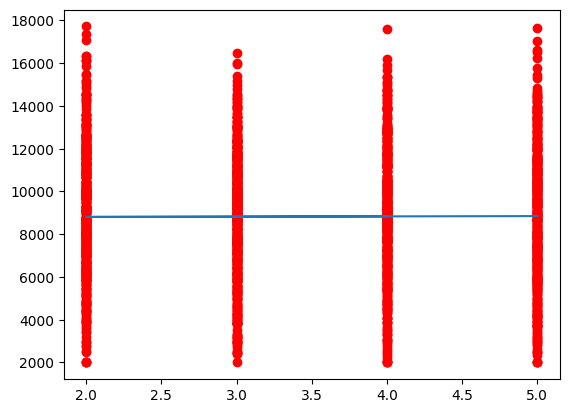

<Axes: >

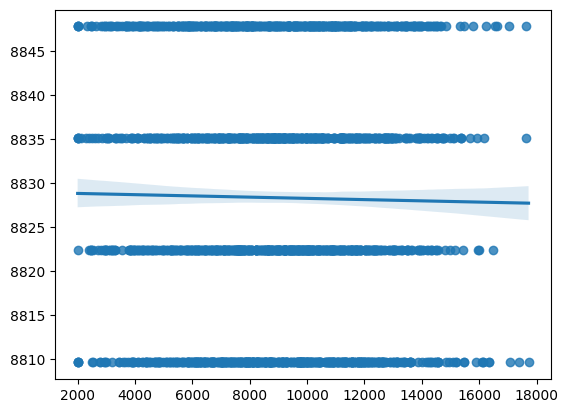

In [29]:
### Visualizacion de Datos
plt.plot(X_test, y_test,  "ro")
plt.plot(X_test, y_pred)
plt.show()
sns.regplot(x= y_test, y=y_pred)


# Regresion Lineal Multiple

## Ejercicio 1: Predicción del precio en función del kilometraje y el año


#### Objetivo: Crear un modelo de regresión lineal múltiple para predecir el precio de un coche utilizando tanto el kilometraje como el año de fabricación.
#### Variables:*
#### Variables independientes (X): Mileage (kilometraje) y Year (año)
#### Variable dependiente (y): Price (precio)
#### Pasos:*
- Importa las bibliotecas necesarias (por ejemplo, pandas y scikit-learn en Python).
- Carga tu conjunto de datos car_price_dataset.csv.
- Selecciona las columnas Mileage, Year y Price.
- Divide tus datos en conjuntos de entrenamiento y prueba.
- Crea un modelo de regresión lineal múltiple y entrénalo con los datos de entrenamiento.
- Evalúa el rendimiento de tu modelo utilizando métricas como el error cuadrático medio (MSE) o el coeficiente de determinación R².
- Interpreta los coeficientes de regresión. ¿Qué significan? ¿Cómo se relacionan con las variables independientes?

In [30]:
### Division De Datos
X= car_db.drop(["Brand","Model", "Engine_Size", "Fuel_Type", "Transmission", "Doors", "Owner_Count", "Price"], axis= 1).values
y = car_db["Price"].values

X_train_ ,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [31]:
### Entrenamiento y Prediccion
model_re = LinearRegression()
model_re.fit(X_train, y_train)

y_pred = model_re.predict(X_test)

### Comparacion Rapida de los Datos
print(Fore.RED + Style.BRIGHT + "Datos Predichos" + Style.RESET_ALL)
print(y_pred[:4])
print(Fore.BLUE + Style.BRIGHT + "Datos Reales" + Style.RESET_ALL)
print(y_test[:4])


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [ ]:
### Metricas de Evaluacion
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(Fore.RED + f"El rmse es: {rmse}" + Style.RESET_ALL)

r2 = r2_score(y_test, y_pred)
print(Fore.RED + f"El r2 es: {r2}" + Style.RESET_ALL)

In [ ]:
### Visualizacion
plt.plot(X_test, y_test, "ro")
plt.plot(X_test, y_pred)
plt.show()

sns.regplot(x = y_test,y = y_pred)

## Ejercicio 2: Predicción del precio en función del tamaño del motor y el número de puertas


#### Objetivo: Crear un modelo de regresión lineal múltiple para predecir el precio de un coche utilizando tanto el tamaño del motor como el número de puertas.
#### Variables:*
#### Variables independientes (X): Engine_Size (tamaño del motor) y Doors (número de puertas)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Engine_Size, Doors y Price.

## Ejercicio 3: Predicción del precio en función del número de propietarios anteriores y el año

#### Objetivo: Crear un modelo de regresión lineal múltiple para predecir el precio de un coche utilizando tanto el número de propietarios anteriores como el año de fabricación.
#### Variables:*
#### Variables independientes (X): Ower_Count (número de propietarios anteriores) y Year (año)
#### Variable dependiente (y): Price (precio)
#### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Ower_Count, Year y Price.

# Regresion Polinomial

## Ejercicio 1 :   Predicción del precio en función del kilometraje (con regresión polinomial) 


### Objetivo: Crear un modelo de regresión polinomial para predecir el precio de un coche en función de su kilometraje. Este ejercicio te permitirá comparar los resultados con el modelo de regresión lineal simple que hiciste anteriormente.
### Variables:*
- Variable independiente (X): Mileage (kilometraje)
- Variable dependiente (y): Price (precio)
### Pasos:*
- Importa las bibliotecas necesarias (por ejemplo, pandas y scikit-learn en Python).
- Carga tu conjunto de datos car_price_dataset.csv.
- Selecciona las columnas Mileage y Price.
- Divide tus datos en conjuntos de entrenamiento y prueba.
- Crea un modelo de regresión polinomial. Puedes empezar con un grado 2 o 3.
- Entrena tu modelo con los datos de entrenamiento.
- Evalúa el rendimiento de tu modelo utilizando métricas como el error cuadrático medio (MSE) o el coeficiente de determinación R².
- Compara los resultados con los obtenidos en el ejercicio de regresión lineal simple. ¿Mejoró el rendimiento del modelo?
- Visualiza tus resultados con un gráfico de dispersión y la curva de regresión polinomial.

In [ ]:
### Importacion de Datos y Preparacion de Datos
X = car_db.iloc[:,6].values.reshape(-1,1)
y = car_db.iloc[:,-1].values


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


### Test y Entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size=0.2)


In [ ]:
### Entrenamiento y Prediccion
poly_regre = LinearRegression()
poly_regre.fit(X_train, y_train)

y_pred = poly_regre.predict(X_test)

In [ ]:
### Metricas y Evaluacion
#### Informal
print(Fore.RED +f"Los valores reales son: {y_test [:4]}" + Style.RESET_ALL)
print(Fore.BLUE +f"Los  valores de la prediccion son: {y_pred[:4]}" + Style.RESET_ALL)

#### Formal
r2 = r2_score(y_test, y_pred)
print(Fore.YELLOW  + f"El r2 es: {r2}")
square = mean_squared_error(y_test, y_pred)
print(Fore.YELLOW  + f"El mean square es: {square}")

In [ ]:
### Visualizacion
plt.plot(X_test[:,1], y_test, "ro") # Debemos selecionar una columan, por que al ser polinomial tiene varias
plt.plot(X_test[:,1], y_pred, color="blue")
plt.show()
# plt.scatter(X_test[:, 1], y_test, color='blue', label='Datos Reales')  # Usar la primera característica para el eje x
# plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicciones')
# plt.xlabel('Mileage')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

In [ ]:
car_db = pd.read_csv("car_price_dataset.csv")

## Ejercicio 2:   Predicción del precio en función del año (con regresión polinomial)


### Objetivo: Crear un modelo de regresión polinomial para predecir el precio de un coche en función de su año de fabricación.
### Variables:*
- Variable independiente (X): Year (año)
- Variable dependiente (y): Price (precio)
### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Year y Price.

In [ ]:
### Conjunto de Datos

X = car_db.iloc[:,2].values.reshape(-1,1)
y = car_db.iloc[:,-1].values

poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X)

### Entrenamiento y Testeo
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size= 0.2, random_state=42)

In [ ]:
### Prediccion
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred = model_poly.predict(X_test)

In [ ]:
### Metricas de Evaluacion
print(Fore.RED+ Back.WHITE + f"El r2 es: {r2_score(y_test, y_pred)}" + Style.RESET_ALL)

In [ ]:
### Grafica

plt.plot(X_test[:,1], y_test, "ro")
plt.plot(X_test[:,1], y_pred, color="blue")

## Ejercio 3: Experimentación con diferentes grados de polinomio


### Objetivo: Experimentar con diferentes grados de polinomio en los ejercicios anteriores y analizar cómo afecta el rendimiento del modelo.
### Pasos:*
- Repite los ejercicios 1 y 2 utilizando diferentes grados de polinomio (por ejemplo, 2, 3, 4, 5).
- Compara el rendimiento de los modelos obtenidos con diferentes grados de polinomio.
- ¿Cuál es el grado de polinomio que mejor se ajusta a los datos? ¿Por qué?

In [ ]:
### Ejercicio1
def model_done(index:str, grade:int):
  X = car_db[index].values.reshape(-1,1)
  y = car_db["Price"].values
  
  poly = PolynomialFeatures(degree=grade)
  X_poly = poly.fit_transfor(X)
 
  X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2)
  
  model_poly = LinearRegression()
  model_poly.fit(X_train, y_train)
  
  y_pred = model_poly.predict(X_test)
  
  print(Fore.RED + f"El R2 es: {r2_score(y_test, y_pred)}")
  
  plt.plot(X_test[:,1], y_test, "ro")
  plt.plot(X_test[:,1], y_pred, color= "red")
  plt.show()
model_done("Year", 3)
model_done("Year", 4)

In [ ]:
### Ejercicio 2

# Maquina de Soporte Regression

## Ejercicio 1 --  Predicción del precio en función del kilometraje (con SVM)

### Objetivo: Crear un modelo de SVM para regresión para predecir el precio de un coche en función de su kilometraje. Este ejercicio te permitirá comparar los resultados con los modelos de regresión lineal y polinomial que hiciste anteriormente.
### Variables:*
### Variable independiente (X): Mileage (kilometraje)
### Variable dependiente (y): Price (precio)
### Pasos:*
- Importa las bibliotecas necesarias (por ejemplo, pandas y scikit-learn en Python).
- Carga tu conjunto de datos car_price_dataset.csv.
- Selecciona las columnas Mileage y Price.
- Divide tus datos en conjuntos de entrenamiento y prueba.
- Crea un modelo de SVM para regresión. Puedes empezar con un kernel lineal o RBF.
- Entrena tu modelo con los datos de entrenamiento.
- Evalúa el rendimiento de tu modelo utilizando métricas como el error cuadrático medio (MSE) o el coeficiente de determinación R².
- Compara los resultados con los obtenidos en los ejercicios de regresión lineal y polinomial. ¿Mejoró el rendimiento del modelo?
- Visualiza tus resultados con un gráfico de dispersión y la curva de regresión del SVM.

In [ ]:
X = car_db["Mileage"].values.reshape(-1,1)
y = car_db["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
### Entrenamiento
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)
### Prediccion

y_pred = svr_model.predict(X_test)

In [ ]:
### Comparacion Informal
print(Fore.RED + f"Las Predicciones: {y_pred}" + Style.RESET_ALL)
print(Fore.RED + f"Los Reales : {y_test}" + Style.RESET_ALL)

### Metrica
print(Fore.BLUE + f"El r2 es: {r2_score(y_test, y_pred)}")

## Ejercicio 2 -- Predicción del precio en función del año (con SVM)

### Objetivo: Crear un modelo de SVM para regresión para predecir el precio de un coche en función de su año de fabricación.
### Variables:*
### Variable independiente (X): Year (año)
### Variable dependiente (y): Price (precio)
### Pasos:
-  Sigue los mismos pasos que en el ejercicio 1, pero utilizando las columnas Year y Price.

In [ ]:
### Datos y Entrenamiento

X= car_db["Year"].values.reshape(-1,1)
Y = car_db["Price"].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


svr_model = SVR(kernel="rbf")

svr_model.fit(X_train, y_train)


y_pred = svr_model.predict(X_test)




In [ ]:
### Evaluation

r2 = r2_score(y_test, y_pred)
print(Fore.RED + f"{r2}" + Style.RESET_ALL)

print(f"Valores Reales: {y_test}; Valores de Prediccion: {y_pred}")


## Ejercicio 3 -- Predicción del precio en función del kilometraje y el año (con SVM)

### Objetivo: Crear un modelo de SVM para regresión para predecir el precio de un coche en función de su kilometraje y año de fabricación. Este ejercicio te permitirá combinar dos variables y evaluar el rendimiento del modelo.
### Variables:*
### Variables independientes (X): Mileage (kilometraje) y Year (año)
### Variable dependiente (y): Price (precio)
### Pasos: 
- Sigue los mismos pasos que en los ejercicios anteriores, pero utilizando las columnas Mileage, Year y Price.

In [ ]:
### Datos y Entrenamiento
y = car_db["Price"].values
X = car_db[["Year", "Mileage"]].values
# print(len(car_db["Mileage"]))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


svr_model = SVR(kernel="rbf")
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)

In [ ]:
### Metricas
r2 = r2_score(y_test, y_pred)
print(r2)


print(Fore.GREEN + f"Valores Reales: {y_test}; Valores de Prediccion: {y_pred}")



## Ejercicio 4 -- Predicción del precio en función del tamaño del motor y el número de puertas (con SVM)

### Objetivo: Crear un modelo de SVM para regresión para predecir el precio de un coche en función del tamaño de su motor y número de puertas.
### Variables:*
### Variables independientes (X): Engine_Size (tamaño del motor) y Doors (número de puertas)
### Variable dependiente (y): Price (precio)
### Pasos: 
- Sigue los mismos pasos que en los ejercicios anteriores, pero utilizando las columnas Engine_Size, Doors y Price.

In [ ]:
#
#* Datos
X = car_db[["Engine_Size", "Doors"]].values
y = car_db["Price"].values


X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



#* Entrenamiento

svr_model = SVR()
svr_model.fit(X_train, y_train)
#* Prediccion
y_pred = svr_model.predict(X_test)

#* Comparacion Informal

print(Fore.RED + f"Los valores reales son: {y_test}"+ Style.RESET_ALL)
print(Fore.BLUE + f"Los valores predictos son: {y_pred}"+ Style.RESET_ALL)

#* Comparacion Formal

r2 = r2_score(y_test, y_pred)
print(Fore.GREEN + f"El R2 es:  {r2}"+ Style.RESET_ALL)

Los valores reales son: [13627  4924 15224 ...  3599  2379  4705]
Los valores predictos son: [8809.15632311 8809.15632311 8809.15632311 ... 8809.15632311 8809.15632311
 8809.15632311]
El R2 es:  -0.0040728999704884306


## Ejercicio 5 -- Predicción del precio en función del número de propietarios anteriores y el año (con SVM)

### Objetivo: Crear un modelo de SVM para regresión para predecir el precio de un coche en función del número de propietarios anteriores y el año de fabricación.
### Variables:*
### Variables independientes (X): Ower_Count (número de propietarios anteriores) y Year (año)
### Variable dependiente (y): Price (precio)
### Pasos: 
- Sigue los mismos pasos que en los ejercicios anteriores, pero utilizando las columnas Ower_Count, Year y Price.

In [ ]:
#
#* Datos

X = car_db[["Owner_Count", "Year"]].values
y = car_db["Price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#* Entrenamiento

svr_model = SVR()
svr_model.fit(X_train, y_train)

#*  Prediccion
y_pred = svr_model.predict(X_test)
# print(svr_model.predict())

#* Comparacion Informal
print(Fore.RED + f"Los valores reales son: {y_test}"+ Style.RESET_ALL)
print(Fore.BLUE + f"Los valores predictos son: {y_pred}"+ Style.RESET_ALL)

#* Comparacion Formal

r2 = r2_score(y_test, y_pred)
print(Fore.GREEN + f"El R2 es:  {r2}"+ Style.RESET_ALL)

Los valores reales son: [ 6041  2000 11757 ... 15380 16759  8344]
Los valores predictos son: [8872.07313709 8871.98163123 8872.53046932 ... 8872.65247275 8872.62200802
 8872.40856814]
El R2 es:  8.87327724164999e-05


# Arboles Aleatorios

## Ejercicio 1 --  Predicción del precio en función del año (con árbol de decisión)


### Objetivo: Crear un modelo de árbol de decisión para predecir el precio de un coche basándote en su año de fabricación.
### Variables:*
- Variable independiente (X): Year (año)
- Variable dependiente (y): Price (precio)
### Pasos:*
- Importa las herramientas necesarias de Python (como pandas y scikit-learn).
- Carga tu archivo car_price_dataset.csv.
- Elige las columnas Year y Price.
- Divide tus datos en dos partes: una para entrenar el modelo y otra para probar qué tan bien funciona.
- Crea un modelo de árbol de decisión para regresión y entrénalo con la parte de los datos para entrenar.
- Prueba tu modelo con la otra parte de los datos y mira qué tan cerca están tus predicciones de los precios reales. Puedes usar medidas como el error cuadrático medio (MSE) para ver qué tan bien funciona tu modelo.

ic| car_db.info(): None
ic| car_db["

Price"].value_counts(): Price
                                    2000     93
                                    8217      7
                                    9189      7
                                    8630      6
                                    9498      6
                                             ..
                                    6687      1
                                    14954     1
                                    10272     1
                                    4214      1
                                    3342      1
                                    Name: count, Length: 6661, dtype: int64


Informacion General
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
Contador de Datos
Histograma de los Datos


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine_Size'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Doors'}>],
       [<Axes: title={'center': 'Owner_Count'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

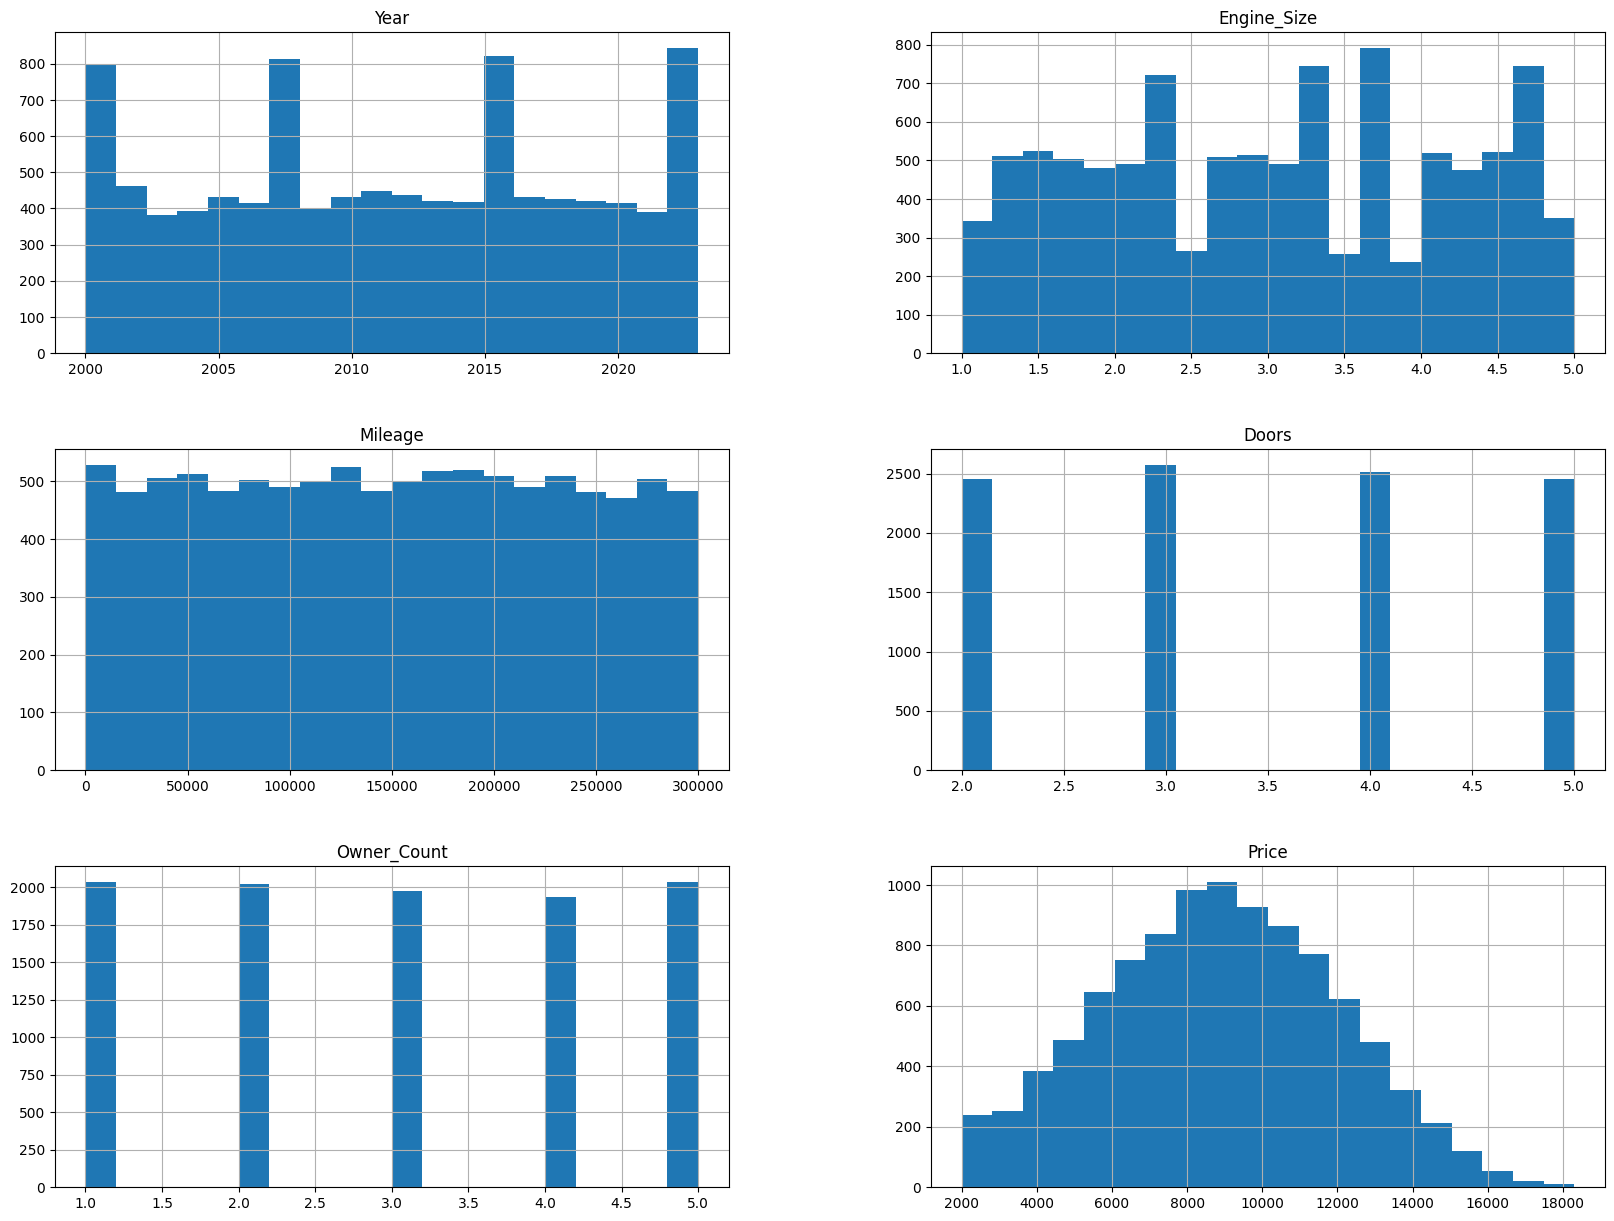

In [ ]:
#
#* Visualizacion de Datos 
print(Fore.RED + "Informacion General" + Style.RESET_ALL)
ic(car_db.info())
print(Fore.RED + "Contador de Datos" + Style.RESET_ALL)
ic(car_db["Price"].value_counts())
print(Fore.RED + "Histograma de los Datos" + Style.RESET_ALL)
car_db.hist(bins=20, figsize=(20, 15))
print(Fore.RED + "Grafico de Calor" + Style.RESET_ALL)

car_db.plot(kind="scatter", x="Mileage", y="Owner_Count", alpha=0.4, s=car_db[])


<Axes: >

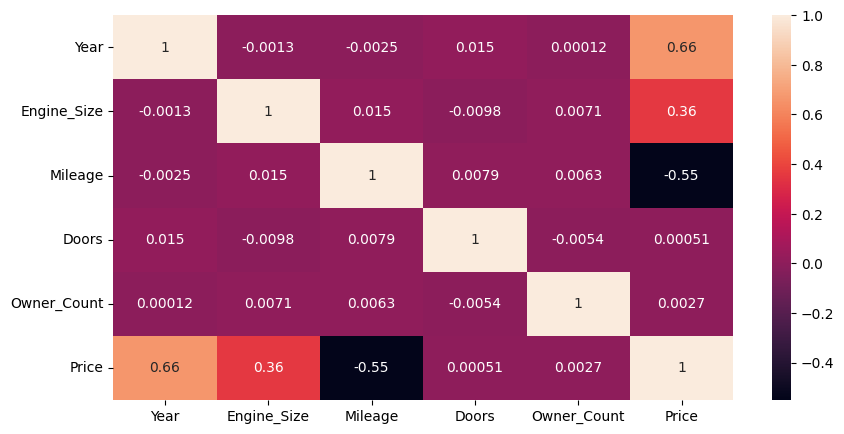

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(car_db.drop(["Brand", "Model", "Fuel_Type", "Transmission"], axis=1).corr(), annot=True)

In [39]:
corr_matrix = car_db.drop(["Brand", "Model", "Fuel_Type", "Transmission"], axis=1).corr()
corr_matrix["Price"].sort_values(ascending=False)

Price          1.000000
Year           0.663036
Engine_Size    0.357403
Owner_Count    0.002656
Doors          0.000511
Mileage       -0.551227
Name: Price, dtype: float64

In [9]:
#
#* Arbol de Decision
from sklearn.tree import DecisionTreeRegressor
y = car_db["Price"].values.reshape(-1,1)
X = car_db[[
  "Year" 
]].values  # Ensure X has 2 features to match X_train_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)  # Use X_train instead of X_train_

y_pred = tree_model.predict(X_test)  # X_test now has the correct number of features

print(y_pred[:4])
print(y_test[:4])


print(r2_score(y_test, y_pred))

[7004.69387755 9174.56402439 8592.79889807 7555.625     ]
[[ 2000]
 [11164]
 [14630]
 [ 7334]]
0.4372410105863953


## Ejercicio 2 --Predicción del precio en función del kilometraje (con árbol de decisión)

### Objetivo: Crear un modelo de árbol de decisión para predecir el precio de un coche basándote en cuántos kilómetros tiene.
### Variables:*
-Variable independiente (X): Mileage (kilometraje)
-Variable dependiente (y): Price (precio)
### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero usando las columnas Mileage y Price.

In [24]:
#
#* Datos

X = car_db["Mileage"].values.reshape(-1,1)
y = car_db["Price"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#* Entrenamiento
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)
print(y_test)
print(y_pred)
print(r2_score(y_pred, y_test))

[[ 9729]
 [12302]
 [ 9885]
 ...
 [ 8245]
 [ 8285]
 [ 7567]]
[ 8430. 12402.  2000. ...  9495.  6485. 10767.]
-0.3875029277475903


## Ejercicio 3 -- Predicción del precio usando dos características (con árbol de decisión)

### Objetivo: Crear un modelo de árbol de decisión para predecir el precio usando dos cosas sobre el coche: el año y el kilometraje.
### Variables:*
-Variables independientes (X): Year (año) y Mileage (kilometraje)
-Variable dependiente (y): Price (precio)
### Pasos: Sigue los mismos pasos que en el ejercicio 1, pero ahora selecciona ambas columnas (Year y Mileage) como tus variables independientes.

In [25]:
#
#* Datos

X = car_db[["Year", "Mileage"]].values
y = car_db["Price"].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#* Entrenamiento

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(y_pred)
print(y_test)

print(r2_score(y_pred, y_test))

[ 6754.  8172.  9114. ... 12845.  4812.  7088.]
[[ 7459]
 [ 6781]
 [ 7818]
 ...
 [ 7345]
 [ 8504]
 [13169]]
0.43548038617237517
